In [1]:
#import all the necessary dictionaries
#PyTorch is used 
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

C:\Users\aniru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the FNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Define the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Initialize the model and optimizer
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Train the model
train_loss = []
test_loss = []
for epoch in range(10):
    epoch_train_loss = 0
    epoch_test_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_loss.append(epoch_train_loss/len(train_loader))

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_test_loss += loss.item()
        test_loss.append(epoch_test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Training Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}')

Epoch 1, Training Loss: 0.3493, Test Loss: 0.1664
Epoch 2, Training Loss: 0.1361, Test Loss: 0.1077
Epoch 3, Training Loss: 0.0937, Test Loss: 0.0842
Epoch 4, Training Loss: 0.0670, Test Loss: 0.0743
Epoch 5, Training Loss: 0.0489, Test Loss: 0.0817
Epoch 6, Training Loss: 0.0406, Test Loss: 0.0682
Epoch 7, Training Loss: 0.0291, Test Loss: 0.0757
Epoch 8, Training Loss: 0.0255, Test Loss: 0.0722
Epoch 9, Training Loss: 0.0194, Test Loss: 0.0871
Epoch 10, Training Loss: 0.0155, Test Loss: 0.0856


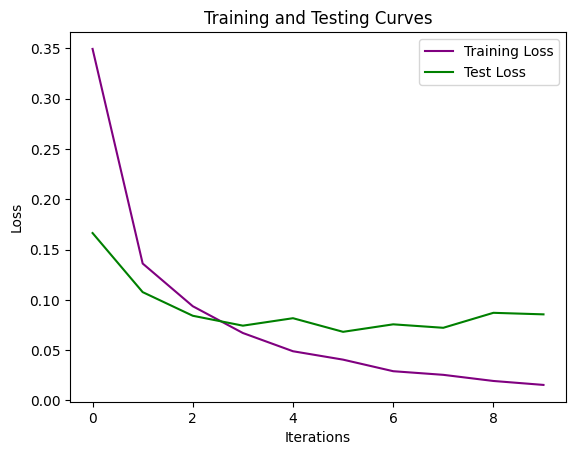

In [6]:

# Plot the training and testing curves
plt.plot(train_loss, label='Training Loss',color = 'purple')
plt.plot(test_loss, label='Test Loss', color = 'green')
plt.title('Training and Testing Curves')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()